In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask,jsonify


In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector=inspect(engine)
columns=inspector.get_columns("measurement")
for c in columns:
    print(c["name"],c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns=inspector.get_columns("station")
for c in columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

2016-08-23


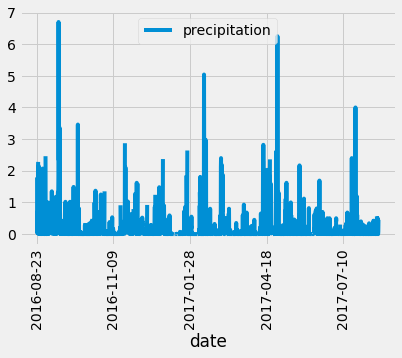

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
data=session.query(Measurement.date,Measurement.prcp).\
                  filter(Measurement.date>="2016-08-23").\
                  filter(Measurement.date<="2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df=pd.DataFrame(data,columns=["date","precipitation"])
#data_df.set_index("date",inplace=True)

# Sort the dataframe by date
data_df=data_df.sort_values(by=["date"])
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(x="date",y="precipitation",rot="90")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [15]:
#get a glimps of the table station
results=engine.execute("select * from Station").all()
results

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
#get a glimps of the table measurement
results=engine.execute("select * from Measurement limit 5").all()
results

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
# Design a query to calculate the total number stations in the dataset
Stations_quantity=session.query(Station).distinct(Station.station).count()
print(Stations_quantity)

9


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
MAS=session.query(Measurement.station,\
                                  func.count(Measurement.station)).\
                                  group_by(Measurement.station).\
                                  order_by(func.count(Measurement.station).desc()).first()
MAS

('USC00519281', 2772)

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temperature=session.query(func.min(Measurement.tobs)).\
             filter(Measurement.station=='USC00519281').scalar()
highest_temperature=session.query(func.max(Measurement.tobs)).\
             filter(Measurement.station=='USC00519281').scalar()
average_temperature=session.query(func.avg(Measurement.tobs)).\
             filter(Measurement.station=='USC00519281').scalar()
print(lowest_temperature)
print(highest_temperature)
print(average_temperature)

54.0
85.0
71.66378066378067


In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation_data=session.query(Measurement.date,Measurement.tobs).\
                  filter(Measurement.date>="2016-08-23").\
                  filter(Measurement.date<="2017-08-23").\
                  filter(Measurement.station=="USC00519281").all()
temperature_observation_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [42]:
tem_df=pd.DataFrame(temperature_observation_data, columns=["date","temperature"])
tem_df

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0.5, 1.0, 'Temperature Frequency Observed')

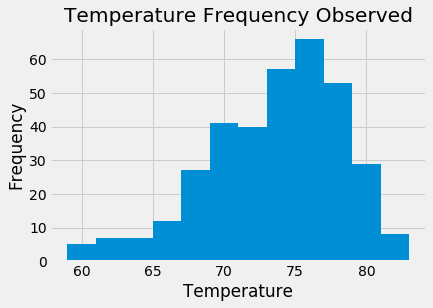

In [43]:
tem_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency Observed")

# Close session

In [44]:
# Close Session
session.close()